In [1]:
%run maze.ipynb

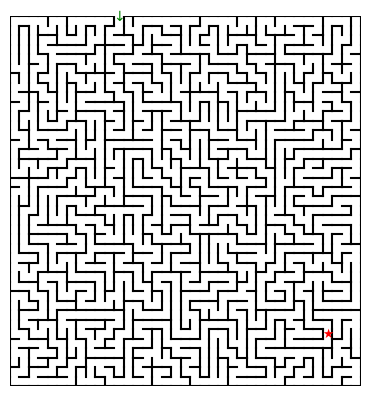

In [2]:
maze = Maze(20, 40)
maze.generate_maze()
maze.display_maze(savefig = True)